In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [2]:
energy = pd.read_csv("data/energydata_complete.csv", index_col = 'date', parse_dates = True)
testdat = pd.read_csv("data/testing.csv", index_col = 'date', parse_dates = True)
traindat = pd.read_csv("data/training.csv", index_col = 'date', parse_dates = True)

In [3]:
temp_sum = energy['T1'] + energy['T2'] + energy['T3'] + energy['T4'] + energy ['T5'] + energy ['T6'] + energy ['T7'] + energy ['T8'] + energy ['T9']
temp_avg = temp_sum/9
energy['Average_Temperature'] = temp_avg

In [4]:
energy.rename(columns = {"T1" : "T_Kitchen", "T2" : "T_LRoom", "T3" : "T_Laundry", "T4" : "T_Office", "T5" : "T_Bath", "T6" : "T_North", "T7" : "T_Iron" , "T8" : "T_Teen" , "T9" : "T_Parents"}, inplace = True)

In [5]:
energy.rename(columns = {"R1" : "R_Kitchen", "R2" : "R_LRoom", "R3" : "R_Laundry", "R4" : "R_Office", "R5" : "R_Bath", "R6" : "North", "R7" : "R_Iron", "R8" : "R_Teen", "R9" : "R_Parents"}, inplace = True)

In [6]:
energy.rename(columns = {"Visibility" : "Visibility (in km)", "Windspeed" : "Windspeed in m/s"}, inplace = True)

### Total Appliance usage over the period of the study ###

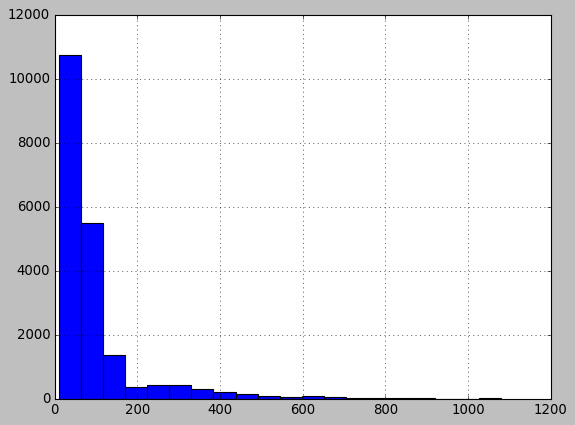

In [7]:
plt.style.use('classic')
energy['Appliances'].hist(bins = 20)

C:\Users\bnb14\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


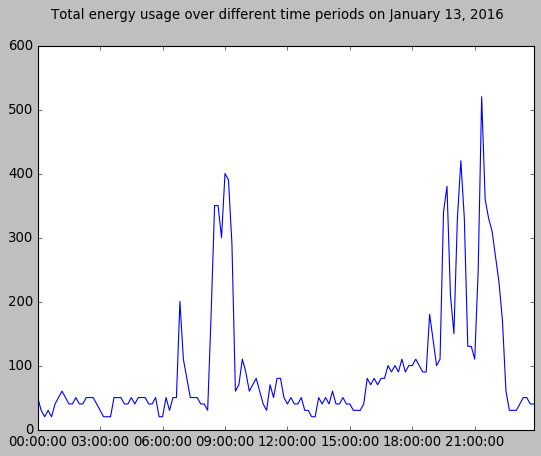

In [8]:
ax1 = plt.plot(energy.Appliances['2016-01-13'])
x = plt.suptitle("Total energy usage over different time periods on January 13, 2016")

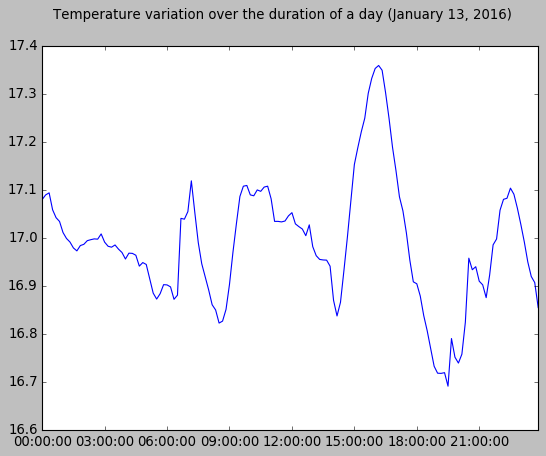

In [9]:
x = plt.plot(energy.Average_Temperature['2016-01-13'])
x = plt.suptitle("Temperature variation over the duration of a day (January 13, 2016)")

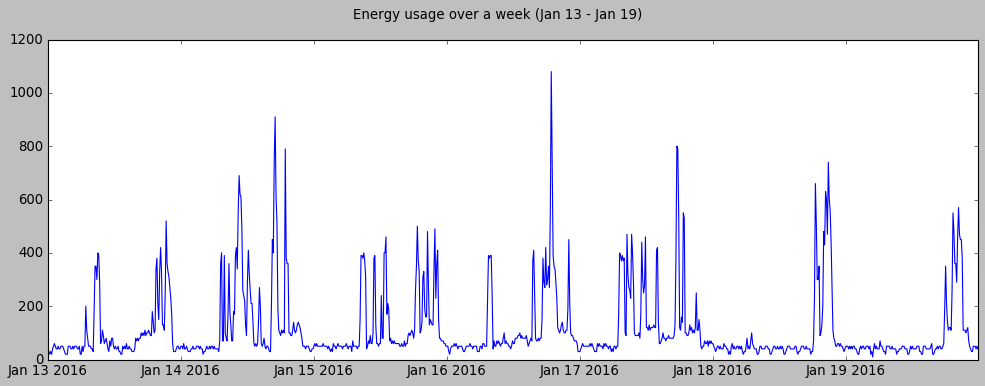

In [10]:
plt.figure(figsize = (15,5))
x = plt.plot(energy.Appliances['2016-01-13':'2016-01-19'])
x = plt.suptitle("Energy usage over a week (Jan 13 - Jan 19)")

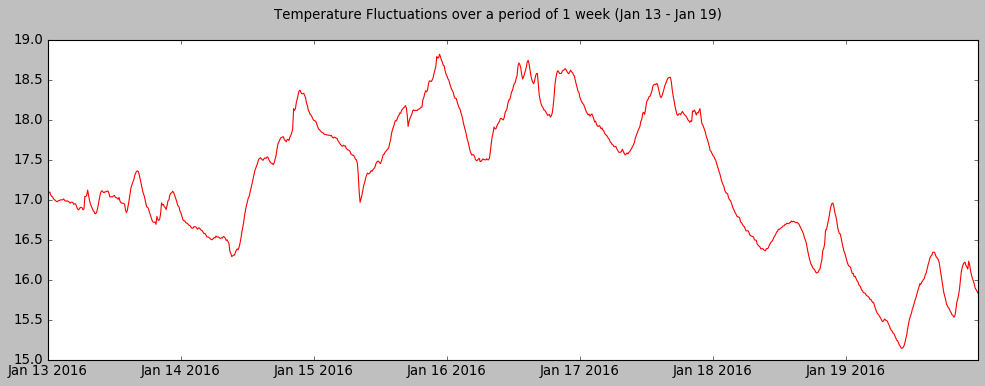

In [11]:
plt.figure(figsize = (15,5))
x = plt.plot(energy.Average_Temperature['2016-01-13':'2016-01-19'], c = 'r')
x  =plt.suptitle("Temperature Fluctuations over a period of 1 week (Jan 13 - Jan 19)")

In [12]:
energy['Weekday'] = energy.index.weekday

In [13]:
energy.Weekday = energy['Weekday'].map({1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 0:'Sunday'})

In [14]:
energy['Weekday'] = energy.Weekday.astype('category')

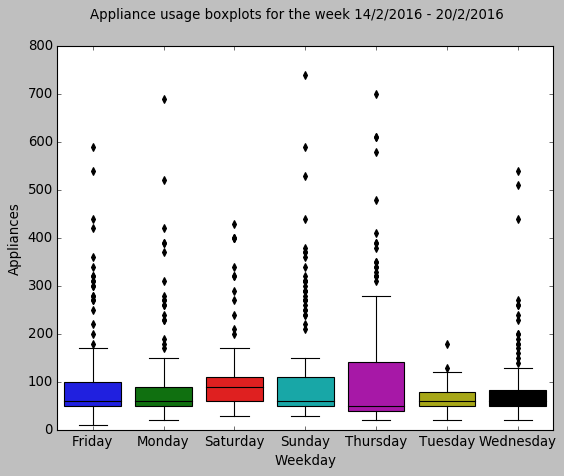

In [15]:
z = sns.boxplot(x = 'Weekday', y = 'Appliances', data = energy['2016-02-14':'2016-02-20'],)
x = plt.suptitle("Appliance usage boxplots for the week 14/2/2016 - 20/2/2016")

If we ignore the outliers, it can be noted that during the week from **14 February 2016 to 20 February 2016**, it can be seen that the median energy usage appears to be the highest during Saturday. The spread of appliance usage is highest on Thursday, indicating that there may be times when appliance usage may be significantly high or low.

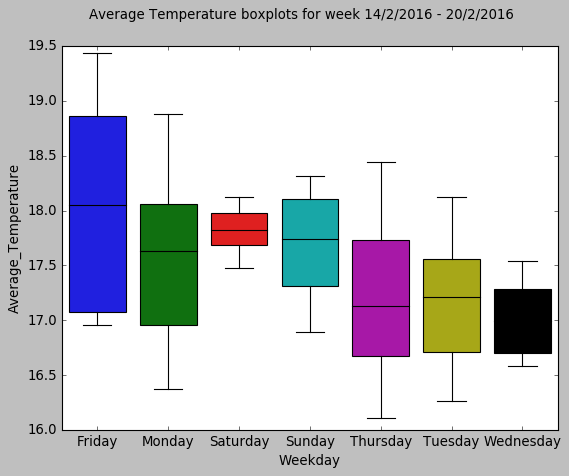

In [16]:
bx = sns.boxplot(x = 'Weekday', y = 'Average_Temperature', data = energy['2016-02-14':'2016-02-20'])
x = plt.suptitle("Average Temperature boxplots for week 14/2/2016 - 20/2/2016")

By looking at the average temperature boxplots, for the same week, it can be seen that the highest median temperature was recorded on **Friday (~18°C)**. Friday also displayed the largest temperature range. The least median temperature was recorded on **Wednesday(~17.1°C)**, but the lowest temperature throughout the week was observed on **Thursday(~16.2°C)**.

The most temperature fluctuations (range) were observed on **Friday** and **Monday**, whereas the least temperature fluctuations were observed on **Saturday**.

In [17]:
traindat['isMon'] = (traindat.Day_of_week == "Monday").astype("int64")
traindat["isTue"] = (traindat.Day_of_week == "Tuesday").astype("int64")
traindat["isWed"] = (traindat.Day_of_week == "Wednesday").astype("int64")
traindat["isThu"] = (traindat.Day_of_week == "Thursday").astype("int64")
traindat["isFri"] = (traindat.Day_of_week == "Friday").astype("int64")
traindat["isSat"] = (traindat.Day_of_week == "Saturday").astype("int64")
traindat["isSun"] = (traindat.Day_of_week == "Sunday").astype("int64")

In [18]:
testdat['isMon'] = (testdat.Day_of_week == "Monday").astype("int64")
testdat["isTue"] = (testdat.Day_of_week == "Tuesday").astype("int64")
testdat["isWed"] = (testdat.Day_of_week == "Wednesday").astype("int64")
testdat["isThu"] = (testdat.Day_of_week == "Thursday").astype("int64")
testdat["isFri"] = (testdat.Day_of_week == "Friday").astype("int64")
testdat["isSat"] = (testdat.Day_of_week == "Saturday").astype("int64")
testdat["isSun"] = (testdat.Day_of_week == "Sunday").astype("int64")

In [19]:
wkd = []
for day in traindat.Day_of_week:
    if day == "Saturday" or day == "Sunday":
        wkd.append(1)
    else:
        wkd.append(0)
traindat["isWeekend"] = wkd

In [20]:
feat_cols = np.array(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'NSM', 'isMon',
       'isTue', 'isWed', 'isThu', 'isFri', 'isSat', 'isSun', 'isWeekend'])

# Linear Regression Model #

### On Training Data ###

In [21]:
X = traindat[['NSM']]
y = traindat['Appliances']

In [22]:
linmod = LinearRegression()
linmod.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
yPred = linmod.predict(X)

In [24]:
print("Equation for line: y = " , linmod.coef_ , "*x + ", linmod.intercept_ , "\n")
print("MSE: ", metrics.mean_squared_error(y, yPred), "\n")
print("R_Squared Value :", metrics.r2_score(y,yPred))

Equation for line: y =  [0.00089024] *x +  59.74354436037471 

MSE:  10078.837234153812 

R_Squared Value : 0.04672801435837293


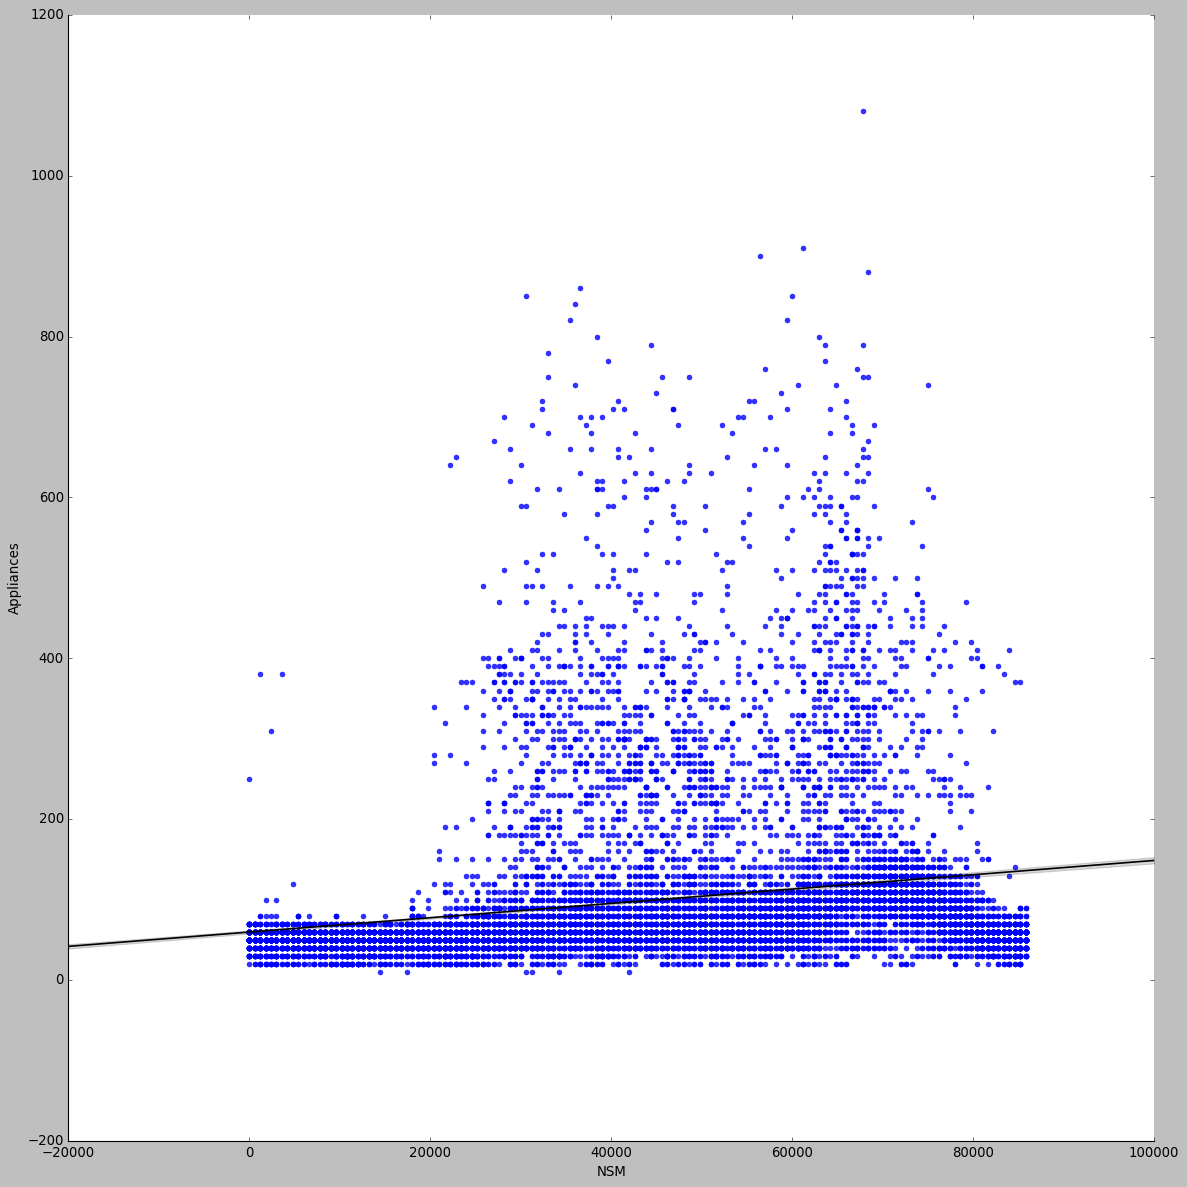

In [25]:
sns.lmplot("NSM", "Appliances", data = traindat, height = 15, line_kws = {'color' : 'k'})

### On Test Data

In [26]:
X_test = testdat[['NSM']]
y_test = testdat['Appliances']

In [27]:
test_Pred = linmod.predict(X_test)

In [28]:
print("MSE: ", metrics.mean_squared_error(y_test, test_Pred), "\n")
print("R_Squared Value :", metrics.r2_score(y_test,test_Pred))

MSE:  9824.383570322969 

R_Squared Value : 0.04833203146208631


<Figure size 2000x960 with 0 Axes>

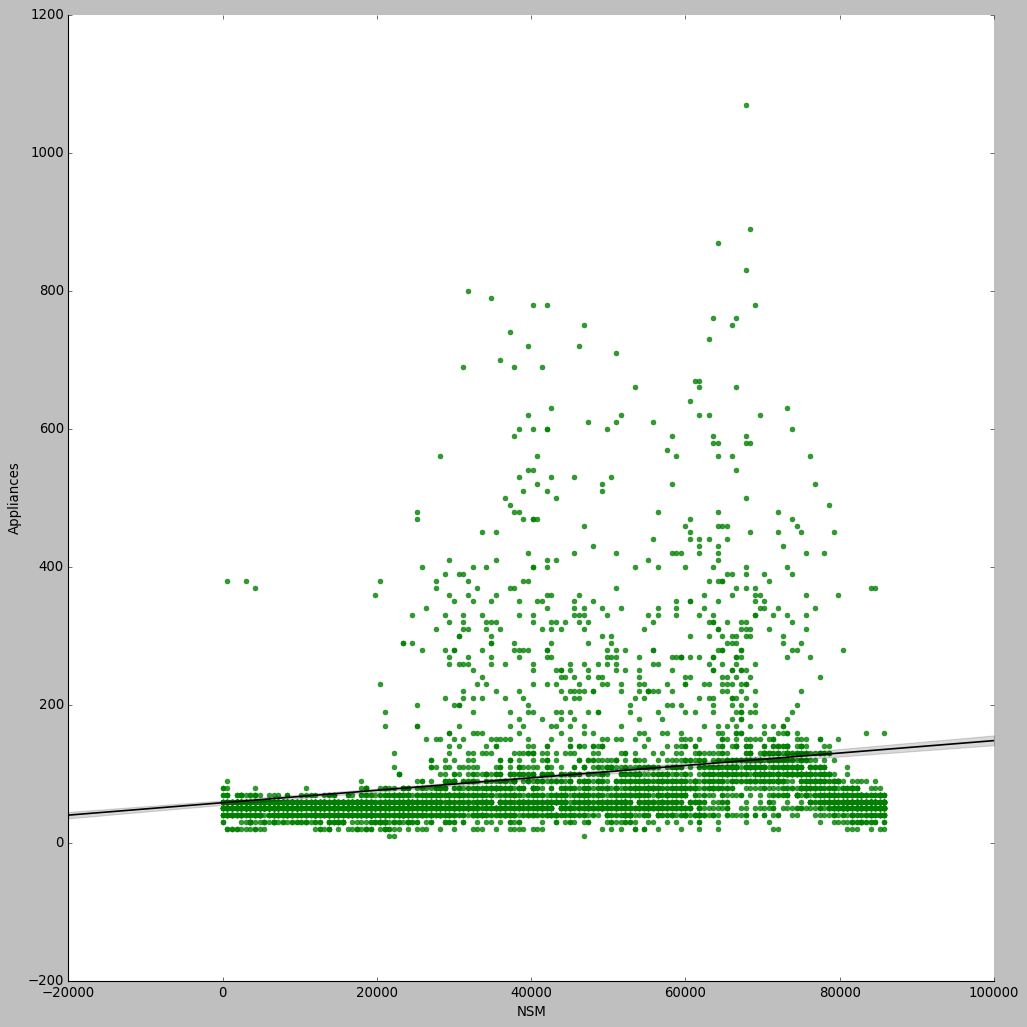

In [29]:
plt.figure(figsize=(25,12))
sns.lmplot(x = "NSM", y = "Appliances", data = testdat, height=13, line_kws={"color" : "k"}, scatter_kws={'color' : 'green'})

# Recursive Feature Elimination #

In [30]:
estimator = LinearRegression()
selector = RFE(estimator, 7)

In [31]:
X_rfe = traindat[feat_cols]
y_rfe = traindat['Appliances']
selector = selector.fit(X_rfe,y_rfe)

In [32]:
supp = selector.get_support()
print("Selected Features: ", feat_cols[supp])
print("Coefficients: ",selector.estimator_.coef_)

Selected Features:  ['RH_1' 'T2' 'RH_2' 'T3' 'T9' 'isMon' 'isSat']
Coefficients:  [ 17.29394904 -19.06980619 -18.23446537  25.13120488  -9.70184655
  14.93280488  14.2594523 ]


In [33]:
rfe_pred = selector.predict(X_rfe)

In [34]:
print("R-Squared value : ",metrics.r2_score(y_rfe, rfe_pred))

R-Squared value :  0.09913012147999178


In [35]:
traindat.isMon = (traindat["isMon"]).astype("category")
traindat.isTue = (traindat["isTue"]).astype("category")
traindat.isWed = (traindat["isWed"]).astype("category")
traindat.isThu = (traindat["isThu"]).astype("category")
traindat.isFri = (traindat["isFri"]).astype("category")
traindat.isSat = (traindat["isSat"]).astype("category")
traindat.isSun = (traindat["isSun"]).astype("category")
traindat.isWeekend = (traindat["isWeekend"]).astype("category")
feat_cats = ['isMon','isTue', 'isWed', 'isThu', 'isFri', 'isSat', 'isSun', 'isWeekend']

In [36]:
times = []
for i in energy.index:
    times.append(datetime.time(i))
energy['Time'] = times

In [37]:
nrg_heatmap = energy[['Weekday', 'Time', 'Appliances']][::6]

In [38]:
from pandas.api.types import CategoricalDtype
nrg_grp = nrg_heatmap.groupby(['Weekday', 'Time'], as_index=False).mean()
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories = cats, ordered = True)
nrg_grp['Weekday'] = (nrg_grp['Weekday'].astype(cat_type))

In [39]:
nrg_grp = nrg_grp.pivot(index = 'Time', columns='Weekday')

Text(0.5, 1, 'Heatmap showing hourly appliance usage')

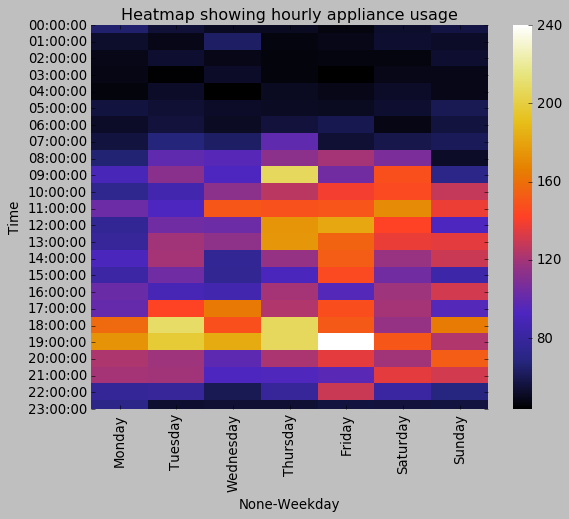

In [40]:
plt.style.use('classic')
heatmap = sns.heatmap(nrg_grp, cmap = "CMRmap", xticklabels=cats)
plt.title("Heatmap showing hourly appliance usage")


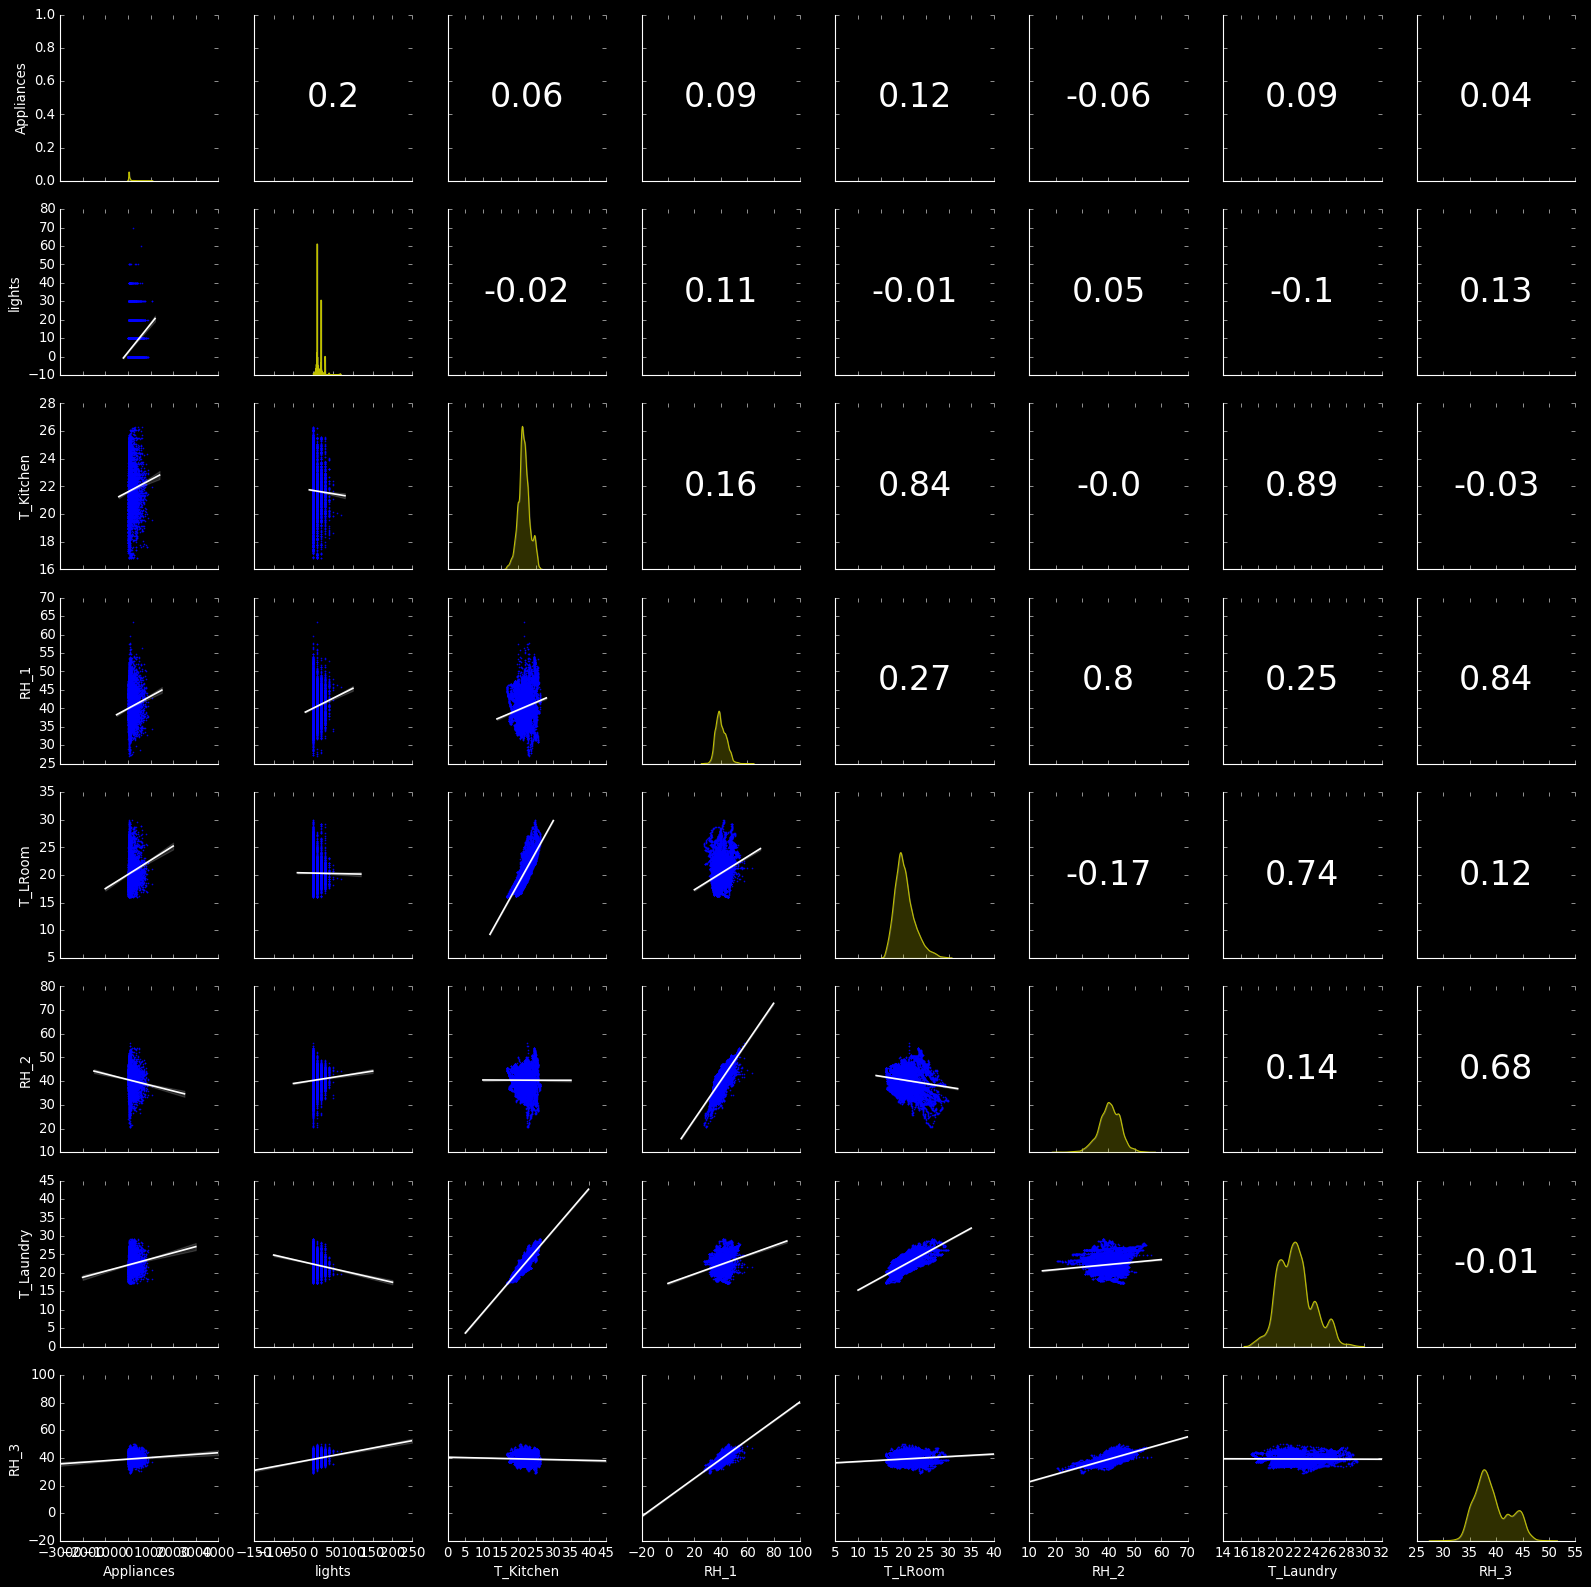

In [41]:
plt.style.use('dark_background')
dat1 = energy[['Appliances', 'lights', 'T_Kitchen', 'RH_1', 'T_LRoom', 'RH_2', 'T_Laundry', 'RH_3']]
prgrd = sns.PairGrid(dat1)
prgrd.map_diag(sns.kdeplot,shade = True, color = 'y')
prgrd.map_lower(sns.regplot, line_kws = {'color' : 'white'}, scatter_kws = {'color' : 'blue', 's' : 1})
def corrAnnotate(*args, **kwargs):
    corr = round(args[0].corr(args[1]), 2)
    ax = plt.gca()
    ax.annotate(corr, [.5, .5,],  xycoords="axes fraction", va='center', ha='center', size = 30)
prgrd.map_upper(corrAnnotate)

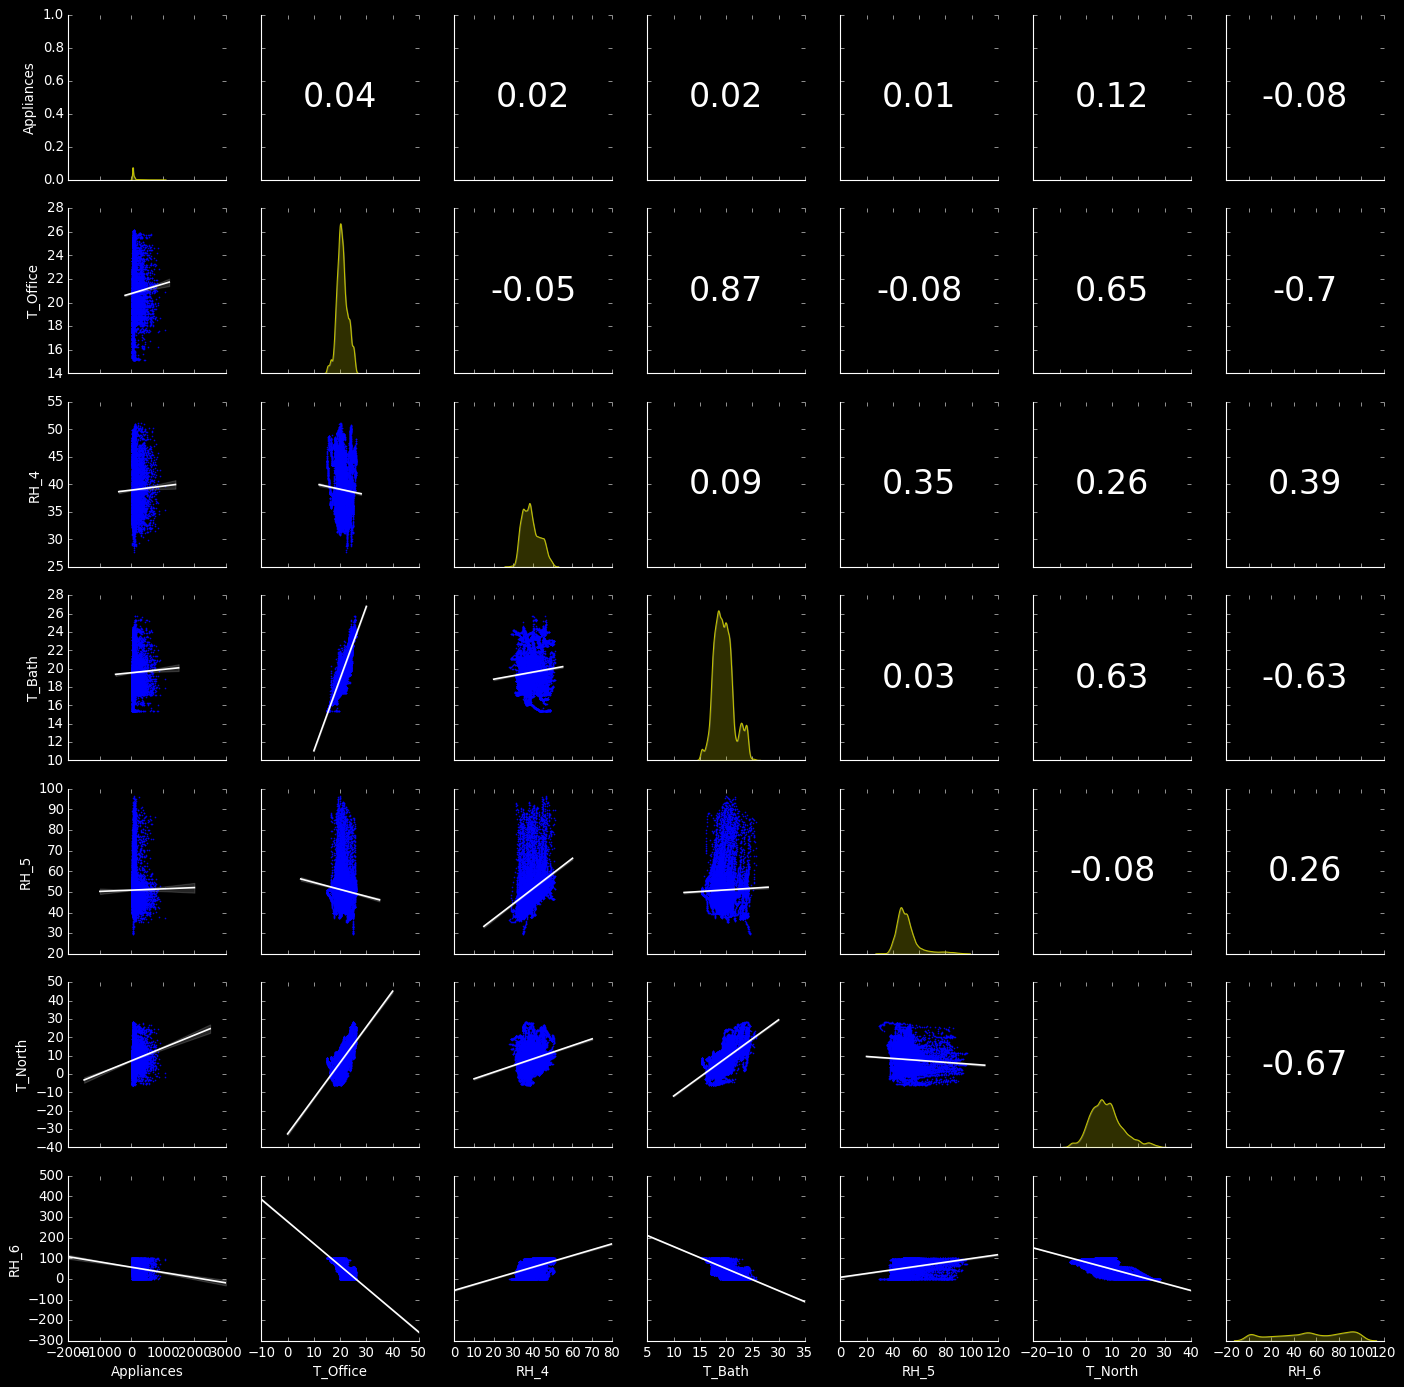

In [42]:
dat2 = energy[['Appliances', 'T_Office', 'RH_4', 'T_Bath', 'RH_5', 'T_North', 'RH_6']]
prgrd2 = sns.PairGrid(dat2)
prgrd2.map_diag(sns.kdeplot,shade = True, color = 'y')
prgrd2.map_lower(sns.regplot, line_kws = {'color' : 'white'}, scatter_kws = {'color' : 'blue', 's' : 1})
prgrd2.map_upper(corrAnnotate)

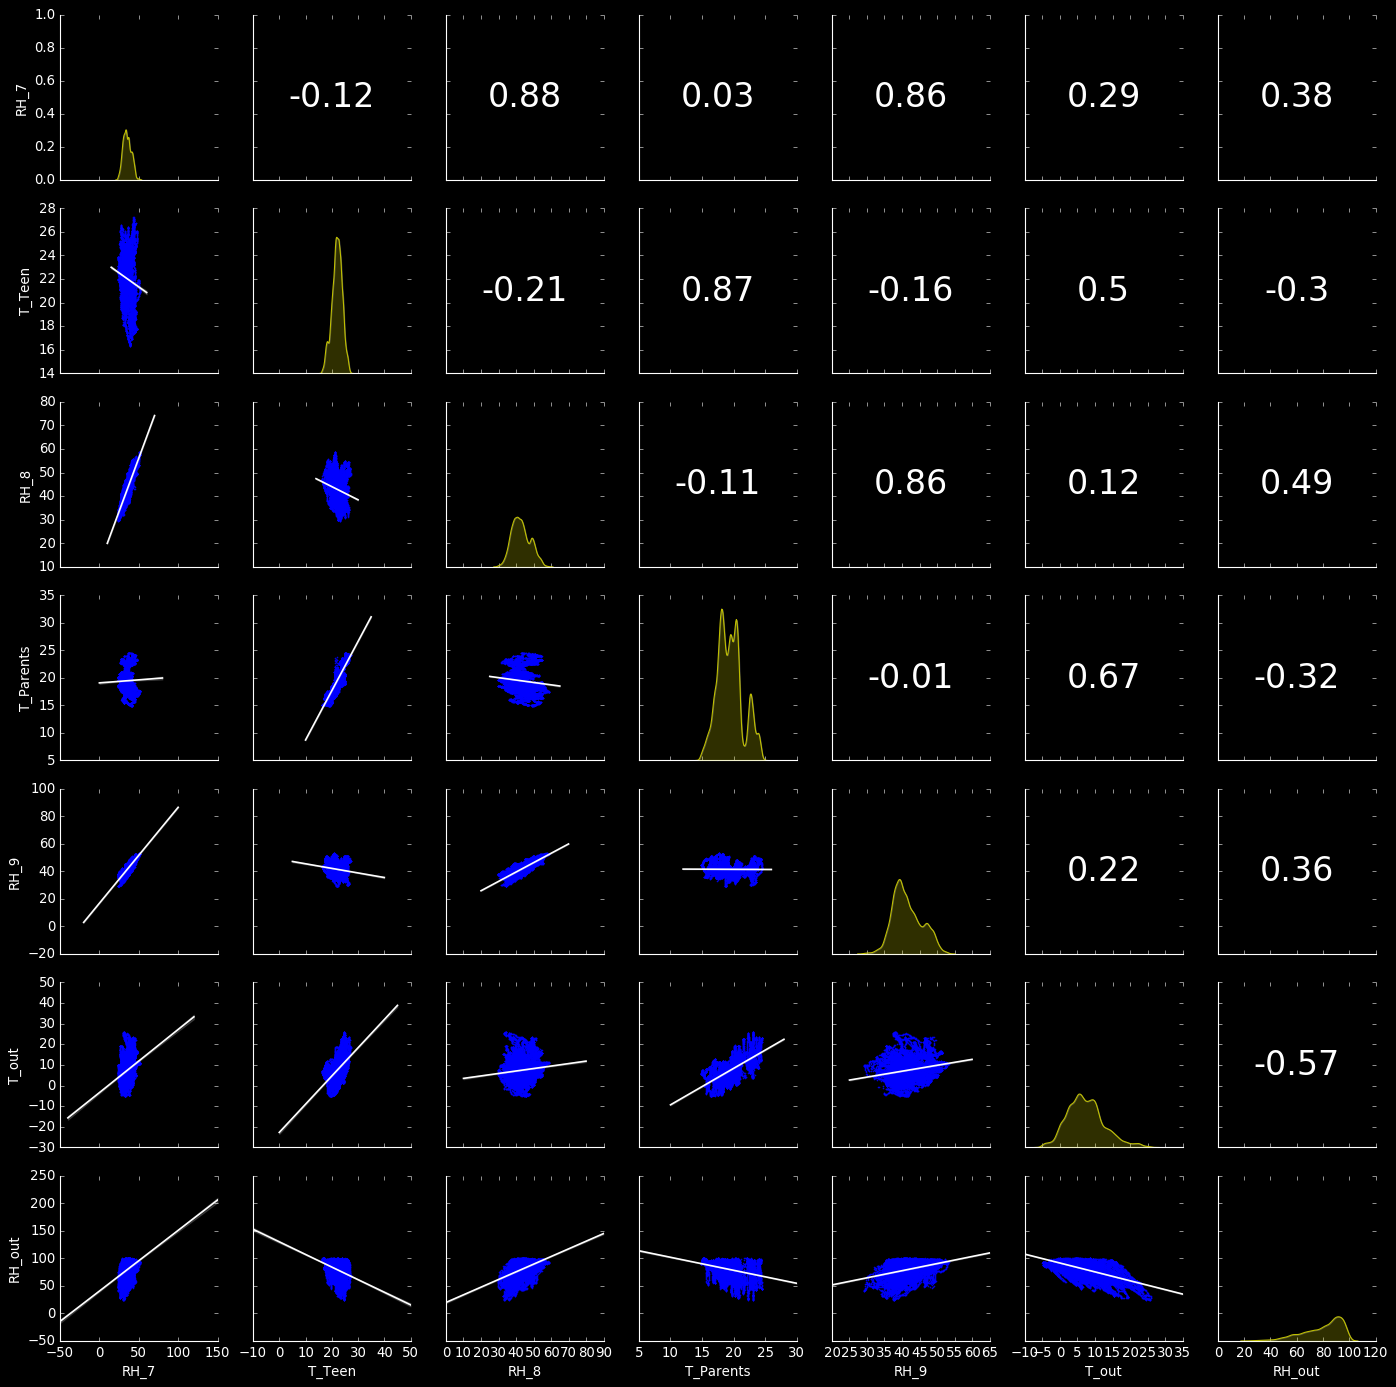

In [43]:
plt.style.use('dark_background')
dat1 = energy[['RH_7', 'T_Teen', 'RH_8', 'T_Parents', 'RH_9','T_out','RH_out']]
prgrd = sns.PairGrid(dat1)
prgrd.map_diag(sns.kdeplot,shade = True, color = 'y')
prgrd.map_lower(sns.regplot, line_kws = {'color' : 'white'}, scatter_kws = {'color' : 'blue', 's' : 1})
def corrAnnotate(*args, **kwargs):
    corr = round(args[0].corr(args[1]), 2)
    ax = plt.gca()
    ax.annotate(corr, [.5, .5,],  xycoords="axes fraction", va='center', ha='center', size = 30)
prgrd.map_upper(corrAnnotate)